In [2]:
import pandas as pd
df = pd.read_excel("Əsas data.xlsx")
df.head(5)

df["Order Date"] = pd.to_datetime(df["Order Date"])

# RFM

In [3]:
current_day = df["Order Date"].max() + pd.Timedelta(days=1)

In [4]:
rfm_df = df.groupby("Customer ID").agg({
    "Order Date" : lambda x: (current_day - x.max()).days,
    "Order ID" : "nunique",
    "Sales" : "sum"
}).reset_index()

rfm_df.columns = ["Customer ID","Recency","Frequency","Monetary"]

# CLV

In [5]:
ilk_sifaris_tarixi = df.groupby('Customer ID')['Order Date'].min().reset_index()
ilk_sifaris_tarixi['Year'] = ilk_sifaris_tarixi['Order Date'].dt.year
yeni_musteriler = ilk_sifaris_tarixi[ilk_sifaris_tarixi['Year'] == 2014]

rfm_yeni = rfm_df[rfm_df["Customer ID"].isin(yeni_musteriler["Customer ID"])].copy()

rfm_yeni['CLV'] = rfm_yeni['Monetary'] * 2

# CAC

In [6]:
total_marketing_cost = 100000
new_customer_count = rfm_yeni.shape[0]
cac = total_marketing_cost / new_customer_count

rfm_yeni["CAC"] = round(cac)

# CLV to CAC

In [7]:
rfm_yeni["CLV_to_CAC"] = (rfm_yeni['CLV'] / rfm_yeni['CAC']).round()

rfm_yeni["STATUS"] = rfm_yeni["CLV_to_CAC"].apply(lambda x: "Karli" if x>3 else "Basabas" if x >= 1 else "Zararli")

rfm_yeni[["Customer ID","CLV","CAC","CLV_to_CAC","STATUS"]].head()

,Customer ID,CLV,CAC,CLV_to_CAC,STATUS
16,AA-3151,21.48,408,0.0,Zararli
51,AB-1052,127.92,408,0.0,Zararli
60,AB-1651,320.22,408,1.0,Basabas
64,AB-2552,566.10,408,1.0,Basabas
66,AB-6001,2764.74,408,7.0,Karli


# Pie Chart

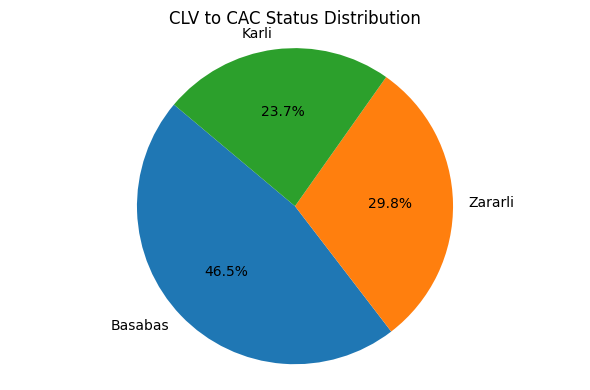

In [9]:
status_counts = rfm_yeni["STATUS"].value_counts()

import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.pie(status_counts, labels= status_counts.index, autopct="%1.1F%%", startangle=140)
plt.title("CLV to CAC Status Distribution")
plt.axis("equal")
plt.tight_layout()
plt.show()